## Previsão de Vendas - Celulares


In [60]:
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

In [61]:
df = pd.read_csv("32.csv", index_col=0)
df.head()

,"ACESSORIO CABO DE FORCA BR 1,80M PRETO M/F C7",ACESSORIO MONOPOD PAU DE SELFIE CABO AMARELO,ACESSORIO MONOPOD PAU DE SELFIE CABO AZUL,ACESSORIO MONOPOD PAU DE SELFIE CABO BRANCO,ACESSORIO MONOPOD PAU DE SELFIE CABO PRETO,ACESSORIO MONOPOD PAU DE SELFIE CABO ROSA,AEREO 120CM 3P CG196 TKA-VERMONT,AEREO CD-211 DUPLO C/NICHO CARV/ONIX UV,AEREO CD-212 QUADRADO 612 CARV/ONIX UV,AEREO GELADEIRA NAPOLI 800X475X305 CARV/BR,...,VENTILADOR VF50 SILENCE FORCE MESA 50CM,VENTILADOR VF52 SILENCE FORCE COLUNA,VENTILADOR VFM2 SIL FORCE VE3230B4,VENTILADOR VFM3 SIL FORCE VE3240B4 PT,VENTILADOR ZEFIRO BLACK 220V MALLORY,VENTILADOR ZEFIRO BR MALLORY,VENTILADOR ZT 401 ZAITEC MATRIX,VIVOBOOK 2G 500 CEL TOUCH ROSA X200MA CT139H,VIVOBOOK 2G 500 CEL TOUCH X200MA CT138H,XXXXXXXXXXXXXXXXXXXXXXXX
2015-01-02,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,0.0,0.0,NaN,1.0,0.0,0.0,0.0,NaN
2015-01-03,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,0.0,0.0,NaN,1.0,0.0,0.0,0.0,NaN
2015-01-05,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,0.0,0.0,NaN,2.0,0.0,0.0,0.0,NaN
2015-01-06,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,0.0,0.0,NaN,1.0,0.0,0.0,0.0,NaN
2015-01-07,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,0.0,0.0,NaN,0.0,0.0,1.0,0.0,NaN


Existem 3980 diferentes produtos na base de dados, que compreendem os números de vendas de vários produtos de categorias distintas, porém, como para este caso queremos apenas dos celulares, então é feita uma filtragem.

In [62]:
[x for x in df.columns if "SMARTPHONE SAMSUNG GAL J" in x]

['SMARTPHONE SAMSUNG GAL J1 ACE J110L DB BCO',
 'SMARTPHONE SAMSUNG GAL J1 ACE J110L DB PRETO',
 'SMARTPHONE SAMSUNG GAL J1 J100M TIM BRANCO',
 'SMARTPHONE SAMSUNG GAL J1 J100M TIM PRETO',
 'SMARTPHONE SAMSUNG GAL J1 J120 4G DB  DOURADO',
 'SMARTPHONE SAMSUNG GAL J1 J120 4G DB  PRETO',
 'SMARTPHONE SAMSUNG GAL J1 J120 DB BRANCO',
 'SMARTPHONE SAMSUNG GAL J1 J120 DB DOURADO',
 'SMARTPHONE SAMSUNG GAL J1 J120 DB PRETO',
 'SMARTPHONE SAMSUNG GAL J1 J120 OI BRANCO',
 'SMARTPHONE SAMSUNG GAL J1 J120 OI DOURADO',
 'SMARTPHONE SAMSUNG GAL J1 J120 OI PRETO',
 'SMARTPHONE SAMSUNG GAL J1 MINI 4G DB BRANCO',
 'SMARTPHONE SAMSUNG GAL J1 MINI 4G DB DOURADO',
 'SMARTPHONE SAMSUNG GAL J1 MINI 4G DB PRETO',
 'SMARTPHONE SAMSUNG GAL J1 MINI DB BRANCO',
 'SMARTPHONE SAMSUNG GAL J1 MINI DB DOURADO',
 'SMARTPHONE SAMSUNG GAL J1 MINI DB PRETO',
 'SMARTPHONE SAMSUNG GAL J2 CLARO BRANCO',
 'SMARTPHONE SAMSUNG GAL J2 CLARO PRETO',
 'SMARTPHONE SAMSUNG GAL J2 CORE 16GB PRATA',
 'SMARTPHONE SAMSUNG GAL J2 CORE 

In [63]:
df = df[[x for x in df.columns if "SMARTPHONE SAMSUNG GAL J" in x]]
              
df.head()

,SMARTPHONE SAMSUNG GAL J1 ACE J110L DB BCO,SMARTPHONE SAMSUNG GAL J1 ACE J110L DB PRETO,SMARTPHONE SAMSUNG GAL J1 J100M TIM BRANCO,SMARTPHONE SAMSUNG GAL J1 J100M TIM PRETO,SMARTPHONE SAMSUNG GAL J1 J120 4G DB DOURADO,SMARTPHONE SAMSUNG GAL J1 J120 4G DB PRETO,SMARTPHONE SAMSUNG GAL J1 J120 DB BRANCO,SMARTPHONE SAMSUNG GAL J1 J120 DB DOURADO,SMARTPHONE SAMSUNG GAL J1 J120 DB PRETO,SMARTPHONE SAMSUNG GAL J1 J120 OI BRANCO,...,SMARTPHONE SAMSUNG GAL J7 J710 METAL DB PRETO,SMARTPHONE SAMSUNG GAL J7 NEO DB DOURADO,SMARTPHONE SAMSUNG GAL J7 NEO DB PRETO,SMARTPHONE SAMSUNG GAL J7 PRIME DB DOURADO,SMARTPHONE SAMSUNG GAL J7 PRIME DB PRETO,SMARTPHONE SAMSUNG GAL J7 PRIME DB ROSA,SMARTPHONE SAMSUNG GAL J7 PRIME TV 2 DB DR,SMARTPHONE SAMSUNG GAL J7 PRIME TV 2 DB PT,SMARTPHONE SAMSUNG GAL J7 PRO J730 DB DR,SMARTPHONE SAMSUNG GAL J7 PRO J730 DB PT
2015-01-02,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-03,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-06,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-07,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Restaram assim 99 produtos diferentes, nota-se uma presença de vários NaN, que serão substituídos por 0.

In [64]:
df.fillna(value=0, inplace=True)

Ajustar a granularidade, os dados vão desde de 2015-01-01 (quinta) até 2019-05-30 (quarta), ajustar a granularidade para ser feita a medição de vendas com base na soma de vendas de um item por semana, esta iniciando na quinta.

In [65]:
df.index = pd.to_datetime(df.index)

dfw = df.resample('W-THU').sum()
dfw.head()

,SMARTPHONE SAMSUNG GAL J1 ACE J110L DB BCO,SMARTPHONE SAMSUNG GAL J1 ACE J110L DB PRETO,SMARTPHONE SAMSUNG GAL J1 J100M TIM BRANCO,SMARTPHONE SAMSUNG GAL J1 J100M TIM PRETO,SMARTPHONE SAMSUNG GAL J1 J120 4G DB DOURADO,SMARTPHONE SAMSUNG GAL J1 J120 4G DB PRETO,SMARTPHONE SAMSUNG GAL J1 J120 DB BRANCO,SMARTPHONE SAMSUNG GAL J1 J120 DB DOURADO,SMARTPHONE SAMSUNG GAL J1 J120 DB PRETO,SMARTPHONE SAMSUNG GAL J1 J120 OI BRANCO,...,SMARTPHONE SAMSUNG GAL J7 J710 METAL DB PRETO,SMARTPHONE SAMSUNG GAL J7 NEO DB DOURADO,SMARTPHONE SAMSUNG GAL J7 NEO DB PRETO,SMARTPHONE SAMSUNG GAL J7 PRIME DB DOURADO,SMARTPHONE SAMSUNG GAL J7 PRIME DB PRETO,SMARTPHONE SAMSUNG GAL J7 PRIME DB ROSA,SMARTPHONE SAMSUNG GAL J7 PRIME TV 2 DB DR,SMARTPHONE SAMSUNG GAL J7 PRIME TV 2 DB PT,SMARTPHONE SAMSUNG GAL J7 PRO J730 DB DR,SMARTPHONE SAMSUNG GAL J7 PRO J730 DB PT
2015-01-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-02-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
su = dfw.sum()
su = su.sort_values(kind='quicksort', ascending=False)
su[:10]

SMARTPHONE SAMSUNG GAL J1 MINI DB DOURADO        805.0
SMARTPHONE SAMSUNG GAL J2 PRIME 16GB TV DB DR    644.0
SMARTPHONE SAMSUNG GAL J5 J500 DB DOURADO        642.0
SMARTPHONE SAMSUNG GAL J2 PRIME 16GB TV DB RS    504.0
SMARTPHONE SAMSUNG GAL J1 J120 DB DOURADO        470.0
SMARTPHONE SAMSUNG GAL J1 MINI DB PRETO          427.0
SMARTPHONE SAMSUNG GAL J2 PRIME 16GB TV DB PT    422.0
SMARTPHONE SAMSUNG GAL J5 PRIME DB DOURADO       385.0
SMARTPHONE SAMSUNG GAL J1 J120 DB PRETO          323.0
SMARTPHONE SAMSUNG GAL J7 PRIME DB DOURADO       234.0
dtype: float64

Uma análise do comportamento de diferentes celulares vendidos no período, iniciando pela correlação.

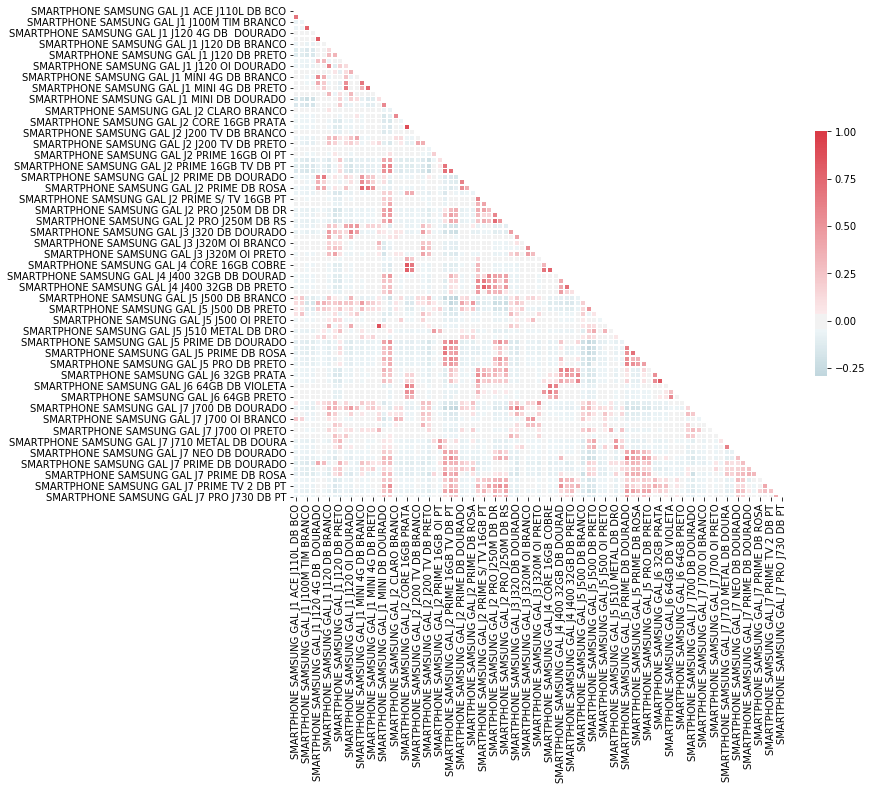

In [67]:
corr = dfw.corr()

# Apenas fazer a plotagem de metade da matriz, pois a matriz é simétrica
mask = np.triu(np.ones_like(corr, dtype=np.bool))

f, ax = plt.subplots(figsize = (11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap = True)

# Desenhar a matriz de correlação usando heatmap
sns.heatmap(corr, mask = mask, cmap = cmap, center = 0,
            square = True, linewidths = .5, cbar_kws = {"shrink": .5})

Percebe-se que existem alguns pares com um vermelho mais intenso, o que indica uma forte correlação.

In [68]:
corr.loc[:,:] = np.tril(corr.values, k=-1)

s = corr.unstack()

so = s.sort_values(kind="quicksort", ascending=False)

#so.columns = ["Aparelho 1", ]
print(so[:20])

SMARTPHONE SAMSUNG GAL J2 CORE 16GB PRATA      SMARTPHONE SAMSUNG GAL J2 CORE 16GB PRETO        0.887223
SMARTPHONE SAMSUNG GAL J1 MINI DB BRANCO       SMARTPHONE SAMSUNG GAL J5 J510 METAL DB BCO      0.864764
SMARTPHONE SAMSUNG GAL J2 CORE 16GB PRATA      SMARTPHONE SAMSUNG GAL J4 CORE 16GB COBRE        0.832380
SMARTPHONE SAMSUNG GAL J1 J120 4G DB  DOURADO  SMARTPHONE SAMSUNG GAL J1 J120 4G DB  PRETO      0.814872
SMARTPHONE SAMSUNG GAL J6 32GB PRATA           SMARTPHONE SAMSUNG GAL J6 32GB PRETO             0.809158
SMARTPHONE SAMSUNG GAL J2 CORE 16GB PRATA      SMARTPHONE SAMSUNG GAL J4 CORE 16GB PRETO        0.791844
SMARTPHONE SAMSUNG GAL J1 J100M TIM BRANCO     SMARTPHONE SAMSUNG GAL J1 J100M TIM PRETO        0.768486
SMARTPHONE SAMSUNG GAL J2 PRIME S/ TV 16GB PT  SMARTPHONE SAMSUNG GAL J4 J400 32GB DB PRETO     0.765820
SMARTPHONE SAMSUNG GAL J4 CORE 16GB COBRE      SMARTPHONE SAMSUNG GAL J4 CORE 16GB PRETO        0.758708
SMARTPHONE SAMSUNG GAL J1 MINI 4G DB DOURADO   SMARTPHO

Percebe-se uma correlação forte (p >=0.7) em 19 pares distintos de aparelhos, sendo que entre CELULAR IPRO I3100 DB BRANCO PRETO eCELULAR IPRO I3200+ DB PRETO VERMELHO há uma correlação forte no maior nível possível (p = 1).

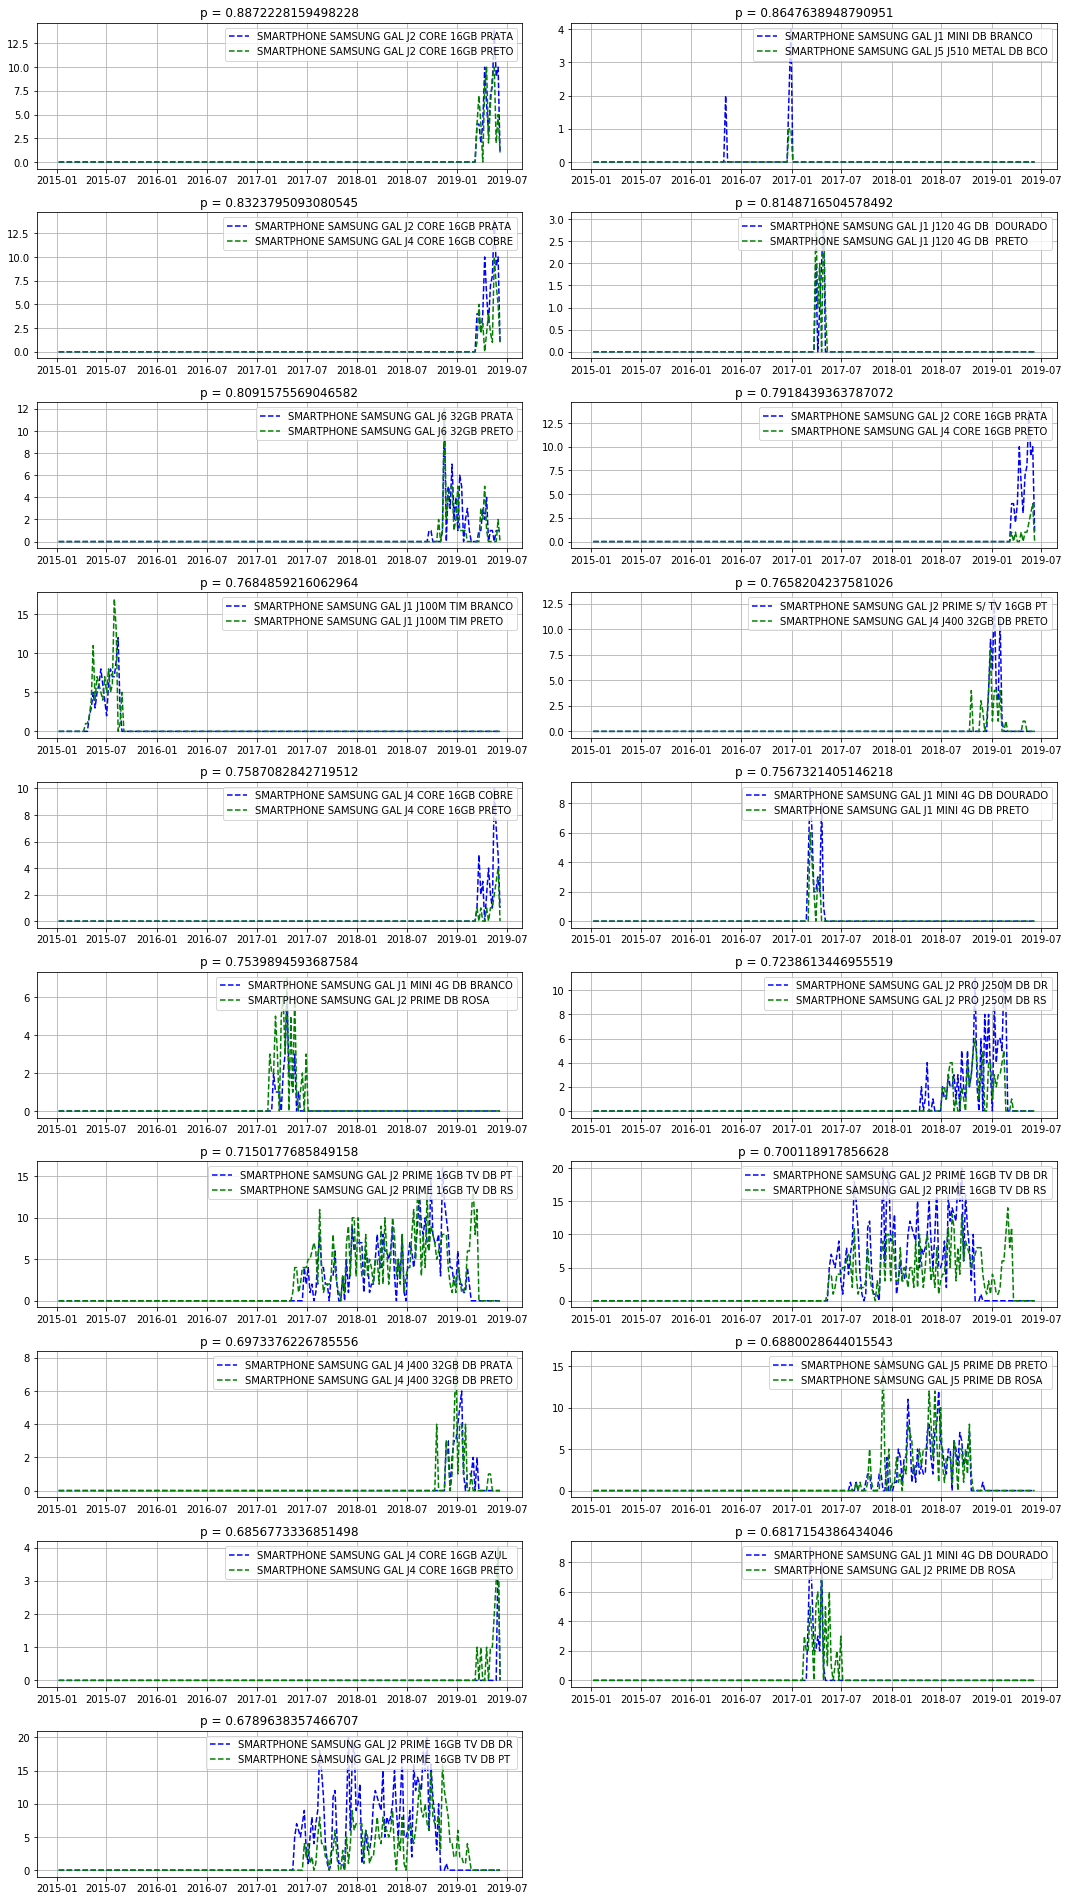

In [69]:
plt.figure(figsize=(15,50))

for i in range(19):
    plt.subplot(19, 2, i+1)
    plt.grid(True)
    plt.plot(dfw[so.index[i][0]], "b--", dfw[so.index[i][1]], "g--", label=so.index[i][0])
    plt.legend([so.index[i][0], so.index[i][1]], loc ='upper right')
    plt.title("p = " + str(so.values[i]))
plt.tight_layout()
plt.show()

A análise dos gráficos mostra que o par com correlação máxima (p = 1) se deve por terem sido vendidos na mesma data, e tendo vendas apenas na mesma semana, logo dado o fato ter sido isolado, não se pode deduzir algo a mais em relação em a este par, adicionalmente, o par CELULAR BLU TANK 2 T193 DUAL BRANCO AZUL e CELULAR BLU TANK 3 T430 DUAL ROSA passa pela mesma situação. Contudo, as vendas 

In [93]:
n = []
for i in range(1, 8):
    fam = [x for x in df.columns if ("SMARTPHONE SAMSUNG GAL J" + str(i)) in x]
    n.append(("SMARTPHONE SAMSUNG GAL J" + str(i)))
    dfw[("SMARTPHONE SAMSUNG GAL J" + str(i))] = dfw[fam].sum(axis=1)

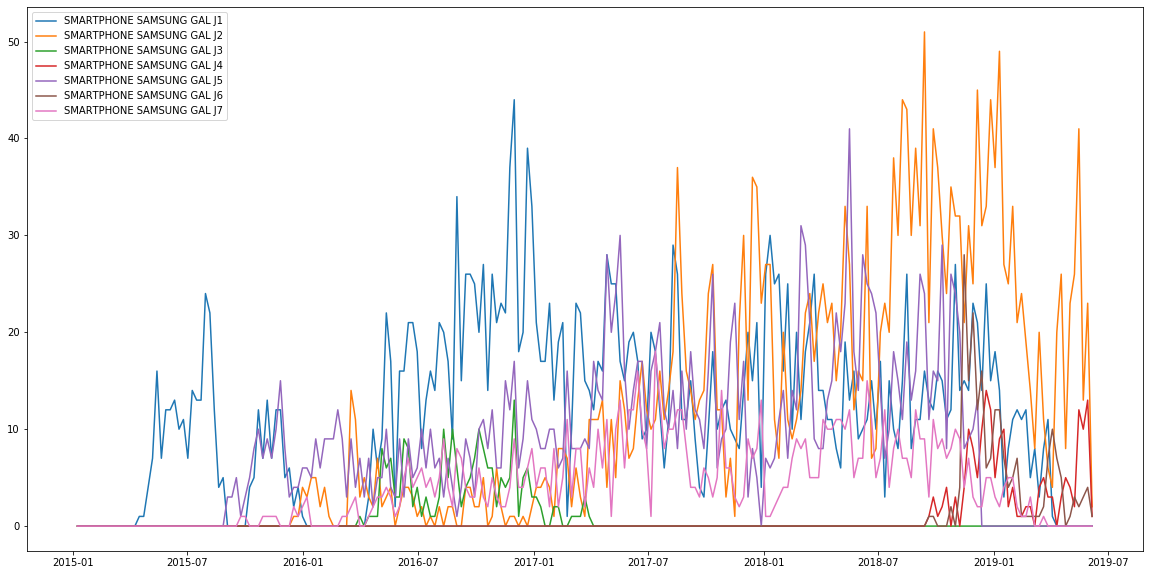

In [95]:
plt.figure(figsize=(20,10))
plt.plot(dfw[n])
plt.legend(n, loc='upper left')

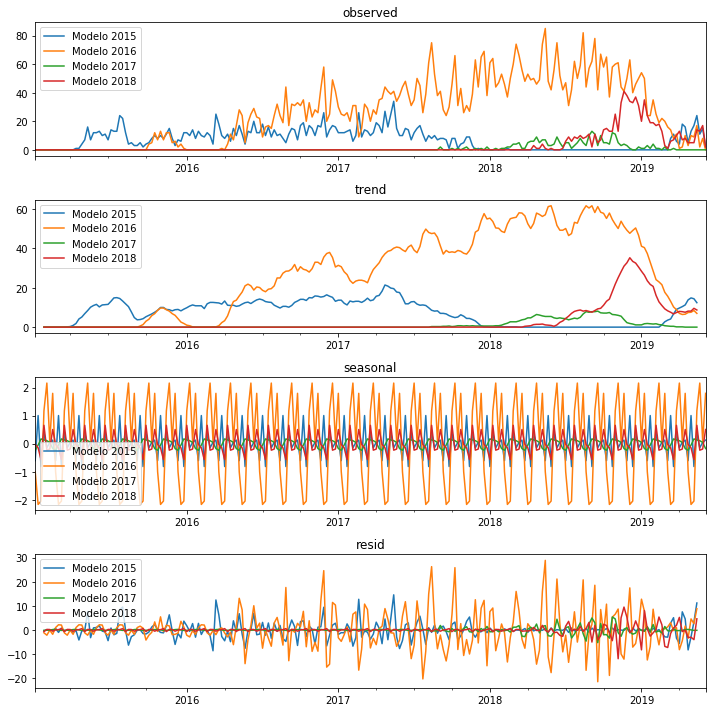

In [147]:
result = seasonal_decompose(dfw[n], model = 'additive', freq = 7)

#Cria 4 figs
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize =(10,10))

#Plota
result.observed.plot(ax = ax1, title = "observed")
result.trend.plot(ax = ax2, title = "trend")
result.seasonal.plot(ax = ax3, title = "seasonal")
result.resid.plot(ax = ax4, title = "resid")

plt.tight_layout()

In [98]:
year_dict = {'SMARTPHONE SAMSUNG GAL J1 ACE J110L DB BCO':'2016',
'SMARTPHONE SAMSUNG GAL J1 ACE J110L DB PRETO':'2016',
'SMARTPHONE SAMSUNG GAL J1 J100M TIM BRANCO':'2015',
'SMARTPHONE SAMSUNG GAL J1 J100M TIM PRETO':'2015',
'SMARTPHONE SAMSUNG GAL J1 J120 4G DB  DOURADO':'2016',
'SMARTPHONE SAMSUNG GAL J1 J120 4G DB  PRETO':'2016',
'SMARTPHONE SAMSUNG GAL J1 J120 DB BRANCO':'2016',
'SMARTPHONE SAMSUNG GAL J1 J120 DB DOURADO':'2016',
'SMARTPHONE SAMSUNG GAL J1 J120 DB PRETO':'2016',
'SMARTPHONE SAMSUNG GAL J1 J120 OI BRANCO':'2016',
'SMARTPHONE SAMSUNG GAL J1 J120 OI DOURADO':'2016',
'SMARTPHONE SAMSUNG GAL J1 J120 OI PRETO':'2016',
'SMARTPHONE SAMSUNG GAL J1 MINI 4G DB BRANCO':'2016',
'SMARTPHONE SAMSUNG GAL J1 MINI 4G DB DOURADO':'2016',
'SMARTPHONE SAMSUNG GAL J1 MINI 4G DB PRETO':'2016',
'SMARTPHONE SAMSUNG GAL J1 MINI DB BRANCO':'2016',
'SMARTPHONE SAMSUNG GAL J1 MINI DB DOURADO':'2016',
'SMARTPHONE SAMSUNG GAL J1 MINI DB PRETO':'2016',
'SMARTPHONE SAMSUNG GAL J2 CLARO BRANCO':'2015',
'SMARTPHONE SAMSUNG GAL J2 CLARO PRETO':'2015',
'SMARTPHONE SAMSUNG GAL J2 CORE 16GB PRATA':'2015',
'SMARTPHONE SAMSUNG GAL J2 CORE 16GB PRETO':'2015',
'SMARTPHONE SAMSUNG GAL J2 J200 TV DB BRANCO':'2015',
'SMARTPHONE SAMSUNG GAL J2 J200 TV DB DOURADO':'2015',
'SMARTPHONE SAMSUNG GAL J2 J200 TV DB PRETO':'2015',
'SMARTPHONE SAMSUNG GAL J2 PRIME 16GB OI DOURA':'2016',
'SMARTPHONE SAMSUNG GAL J2 PRIME 16GB OI PT':'2016',
'SMARTPHONE SAMSUNG GAL J2 PRIME 16GB TV DB DR':'2016',
'SMARTPHONE SAMSUNG GAL J2 PRIME 16GB TV DB PT':'2016',
'SMARTPHONE SAMSUNG GAL J2 PRIME 16GB TV DB RS':'2016',
'SMARTPHONE SAMSUNG GAL J2 PRIME DB DOURADO':'2016',
'SMARTPHONE SAMSUNG GAL J2 PRIME DB PRETO':'2016',
'SMARTPHONE SAMSUNG GAL J2 PRIME DB ROSA':'2016',
'SMARTPHONE SAMSUNG GAL J2 PRIME S/ TV 16GB DR':'2016',
'SMARTPHONE SAMSUNG GAL J2 PRIME S/ TV 16GB PT':'2016',
'SMARTPHONE SAMSUNG GAL J2 PRIME S/ TV 16GB RS':'2016',
'SMARTPHONE SAMSUNG GAL J2 PRO J250M DB DR':'2018',
'SMARTPHONE SAMSUNG GAL J2 PRO J250M DB PT':'2018',
'SMARTPHONE SAMSUNG GAL J2 PRO J250M DB RS':'2018',
'SMARTPHONE SAMSUNG GAL J3 J320 DB BRANCO':'2016',
'SMARTPHONE SAMSUNG GAL J3 J320 DB DOURADO':'2016',
'SMARTPHONE SAMSUNG GAL J3 J320 DB PRETO':'2016',
'SMARTPHONE SAMSUNG GAL J3 J320M OI BRANCO':'2016',
'SMARTPHONE SAMSUNG GAL J3 J320M OI DOURADO':'2016',
'SMARTPHONE SAMSUNG GAL J3 J320M OI PRETO':'2016',
'SMARTPHONE SAMSUNG GAL J4 CORE 16GB AZUL':'2018',
'SMARTPHONE SAMSUNG GAL J4 CORE 16GB COBRE':'2018',
'SMARTPHONE SAMSUNG GAL J4 CORE 16GB PRETO':'2018',
'SMARTPHONE SAMSUNG GAL J4 J400 32GB DB DOURAD':'2018',
'SMARTPHONE SAMSUNG GAL J4 J400 32GB DB PRATA':'2018',
'SMARTPHONE SAMSUNG GAL J4 J400 32GB DB PRETO':'2018',
'SMARTPHONE SAMSUNG GAL J4 J400 32GB DB VIOLET':'2018',
'SMARTPHONE SAMSUNG GAL J5 J500 DB BRANCO':'2015',
'SMARTPHONE SAMSUNG GAL J5 J500 DB DOURADO':'2015',
'SMARTPHONE SAMSUNG GAL J5 J500 DB PRETO':'2015',
'SMARTPHONE SAMSUNG GAL J5 J500 OI DOURADO':'2015',
'SMARTPHONE SAMSUNG GAL J5 J500 OI PRETO':'2015',
'SMARTPHONE SAMSUNG GAL J5 J510 METAL DB BCO':'2016',
'SMARTPHONE SAMSUNG GAL J5 J510 METAL DB DRO':'2016',
'SMARTPHONE SAMSUNG GAL J5 J510 METAL DB PRETO':'2016',
'SMARTPHONE SAMSUNG GAL J5 PRIME DB DOURADO':'2016',
'SMARTPHONE SAMSUNG GAL J5 PRIME DB PRETO':'2016',
'SMARTPHONE SAMSUNG GAL J5 PRIME DB ROSA':'2016',
'SMARTPHONE SAMSUNG GAL J5 PRO DB DOURADO':'2017',
'SMARTPHONE SAMSUNG GAL J5 PRO DB PRETO':'2017',
'SMARTPHONE SAMSUNG GAL J6 32GB DB VIOLETA':'2018',
'SMARTPHONE SAMSUNG GAL J6 32GB PRATA':'2018',
'SMARTPHONE SAMSUNG GAL J6 32GB PRETO':'2018',
'SMARTPHONE SAMSUNG GAL J6 64GB DB VIOLETA':'2018',
'SMARTPHONE SAMSUNG GAL J6 64GB PRATA':'2018',
'SMARTPHONE SAMSUNG GAL J6 64GB PRETO':'2018',
'SMARTPHONE SAMSUNG GAL J7 J700 DB BRANCO':'2015',
'SMARTPHONE SAMSUNG GAL J7 J700 DB DOURADO':'2015',
'SMARTPHONE SAMSUNG GAL J7 J700 DB PRETO':'2015',
'SMARTPHONE SAMSUNG GAL J7 J700 OI BRANCO':'2015',
'SMARTPHONE SAMSUNG GAL J7 J700 OI DOURADO':'2015',
'SMARTPHONE SAMSUNG GAL J7 J700 OI PRETO':'2015',
'SMARTPHONE SAMSUNG GAL J7 J710 METAL DB BRANC':'2016',
'SMARTPHONE SAMSUNG GAL J7 J710 METAL DB DOURA':'2016',
'SMARTPHONE SAMSUNG GAL J7 J710 METAL DB PRETO':'2016',
'SMARTPHONE SAMSUNG GAL J7 NEO DB DOURADO':'2017',
'SMARTPHONE SAMSUNG GAL J7 NEO DB PRETO':'2017',
'SMARTPHONE SAMSUNG GAL J7 PRIME DB DOURADO':'2016',
'SMARTPHONE SAMSUNG GAL J7 PRIME DB PRETO':'2016',
'SMARTPHONE SAMSUNG GAL J7 PRIME DB ROSA':'2016',
'SMARTPHONE SAMSUNG GAL J7 PRIME TV 2 DB DR':'2018',
'SMARTPHONE SAMSUNG GAL J7 PRIME TV 2 DB PT':'2018',
'SMARTPHONE SAMSUNG GAL J7 PRO J730 DB DR':'2017',
'SMARTPHONE SAMSUNG GAL J7 PRO J730 DB PT':'2017'}

In [102]:
n = []
for i in range(5, 9):
    fam = [x for x in df.columns if year_dict.get(x) in ('201' + str(i))]
    n.append(("Modelo 201" + str(i)))
    dfw[("Modelo 201" + str(i))] = dfw[fam].sum(axis=1)

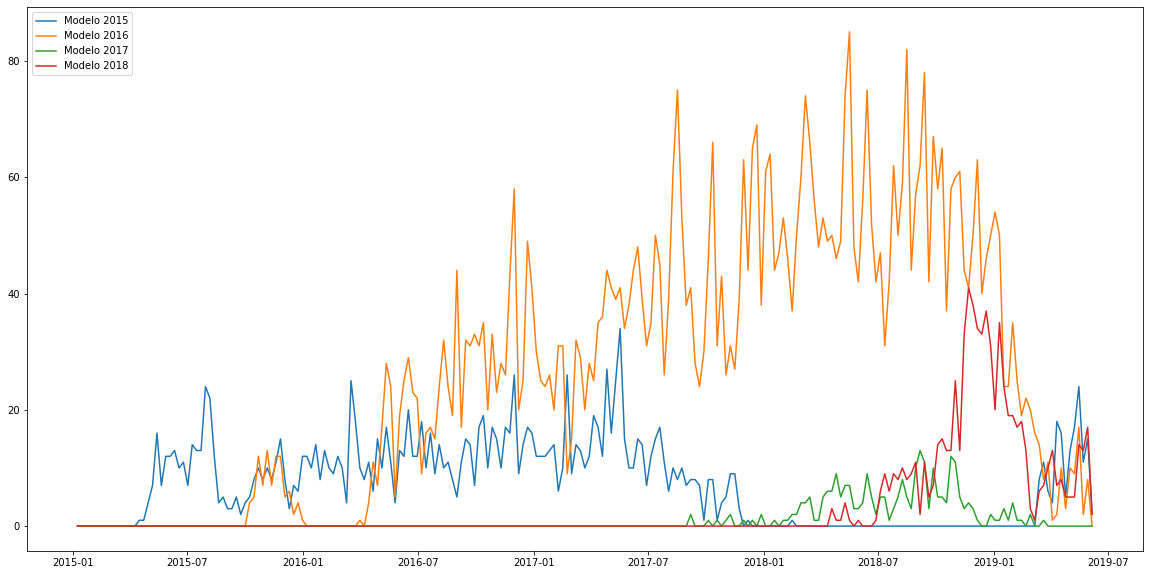

In [103]:
plt.figure(figsize=(20,10))
plt.plot(dfw[n])
plt.legend(n, loc='upper left')

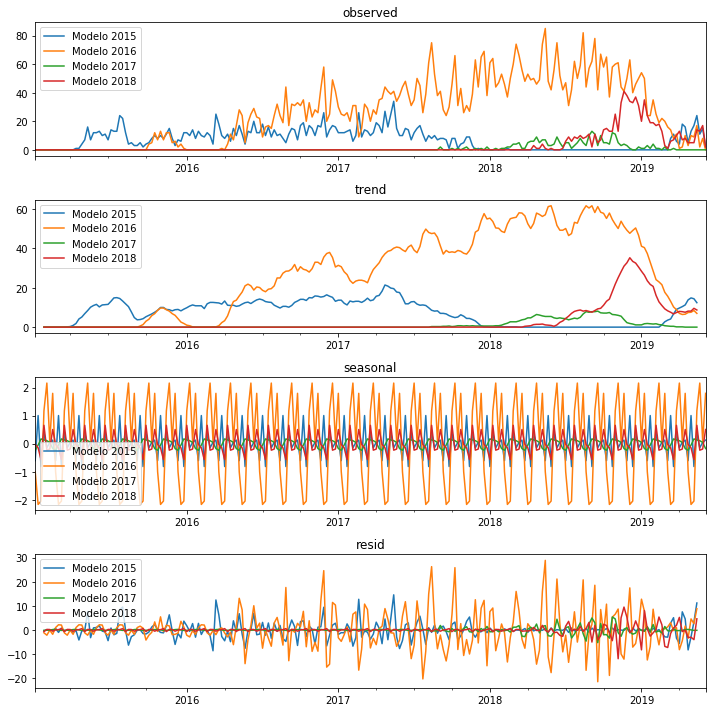

In [105]:
result = seasonal_decompose(dfw[n], model = 'additive', freq = 7)

#Cria 4 figs
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize =(10,10))

#Plota
result.observed.plot(ax = ax1, title = "observed")
result.trend.plot(ax = ax2, title = "trend")
result.seasonal.plot(ax = ax3, title = "seasonal")
result.resid.plot(ax = ax4, title = "resid")

plt.tight_layout()

In [144]:
x = dfw[:int((len(dfw)*2)/3)]
y = dfw.loc['2019-01-01':]

In [145]:
x.head(-1)

,SMARTPHONE SAMSUNG GAL J1 ACE J110L DB BCO,SMARTPHONE SAMSUNG GAL J1 ACE J110L DB PRETO,SMARTPHONE SAMSUNG GAL J1 J100M TIM BRANCO,SMARTPHONE SAMSUNG GAL J1 J100M TIM PRETO,SMARTPHONE SAMSUNG GAL J1 J120 4G DB DOURADO,SMARTPHONE SAMSUNG GAL J1 J120 4G DB PRETO,SMARTPHONE SAMSUNG GAL J1 J120 DB BRANCO,SMARTPHONE SAMSUNG GAL J1 J120 DB DOURADO,SMARTPHONE SAMSUNG GAL J1 J120 DB PRETO,SMARTPHONE SAMSUNG GAL J1 J120 OI BRANCO,...,SMARTPHONE SAMSUNG GAL J2,SMARTPHONE SAMSUNG GAL J3,SMARTPHONE SAMSUNG GAL J4,SMARTPHONE SAMSUNG GAL J5,SMARTPHONE SAMSUNG GAL J6,SMARTPHONE SAMSUNG GAL J7,Modelo 2015,Modelo 2016,Modelo 2017,Modelo 2018
2015-01-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-02-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,31.0,0.0,10.0,9.0,15.0,7.0,0.0,41.0,4.0,41.0
2018-11-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,25.0,0.0,8.0,10.0,22.0,3.0,0.0,50.0,3.0,38.0
2018-12-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,45.0,0.0,5.0,13.0,12.0,2.0,0.0,63.0,1.0,34.0
2018-12-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,31.0,0.0,10.0,0.0,16.0,2.0,0.0,40.0,0.0,33.0


In [137]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(x['Modelo 2016'].values, order=(7,1,0))
fitted = model.fit()
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  207
Model:                 ARIMA(7, 1, 0)   Log Likelihood                -765.218
Method:                       css-mle   S.D. of innovations              9.732
Date:                Wed, 23 Dec 2020   AIC                           1548.436
Time:                        12:58:03   BIC                           1578.430
Sample:                             1   HQIC                          1560.565
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2406      0.199      1.206      0.229      -0.150       0.632
ar.L1.D.y     -0.5483      0.069     -7.996      0.000      -0.683      -0.414
ar.L2.D.y     -0.5688      0.077     -7.359      0.0

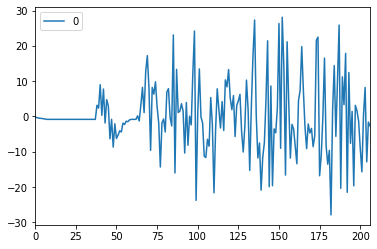

In [138]:
residuals = pd.DataFrame(fitted.resid)
residuals.plot()
plt.show()